# SCIPY exemple de traitement d image

In [96]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage

(734, 1178)


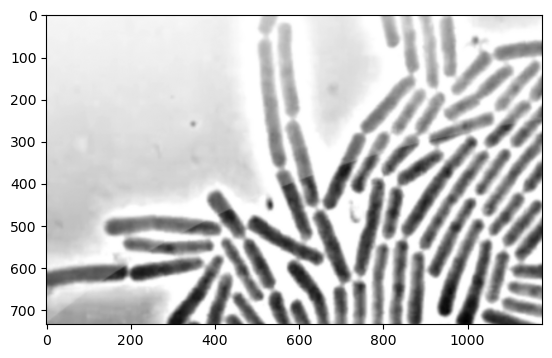

In [97]:
# 1 - chargemnt de la photo en niveau de gris ndim=2

image = plt.imread('bacteries.png')
image = image[:,:,0]
print(image.shape)
plt.imshow(image, cmap='gray')
plt.show()

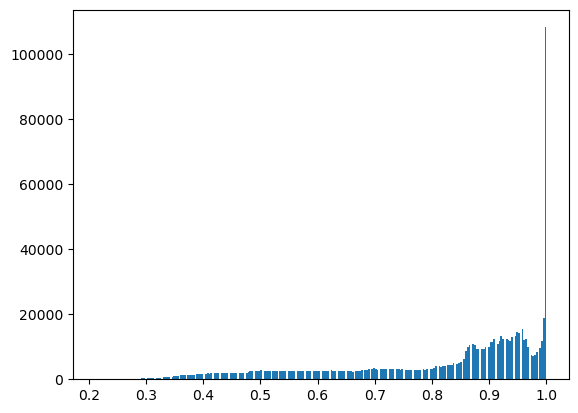

In [98]:
# 2 - Extraction des bacteries de l arriere plan avec boolean mask (filtre passe-bas)

# Recherche de seuil en etudiant la distribution des niveaux de gris
image_plate = image.copy().ravel()
plt.hist(image_plate, bins=255)
plt.show()

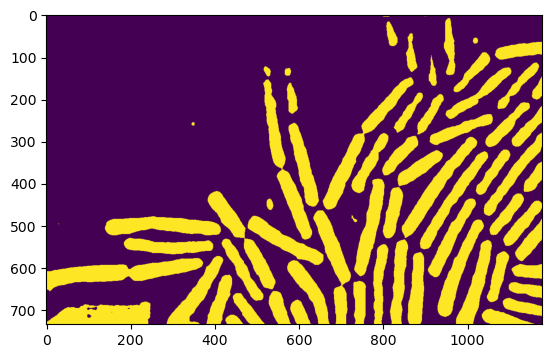

In [99]:
# seuillage
image_filtred = image < 0.75
plt.imshow(image_filtred)
plt.show()

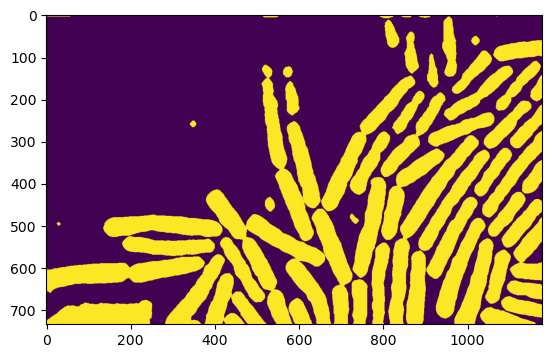

In [100]:
# netoyage
open_x = ndimage.binary_dilation(image_filtred, iterations=4)
plt.imshow(open_x)
plt.show()

59


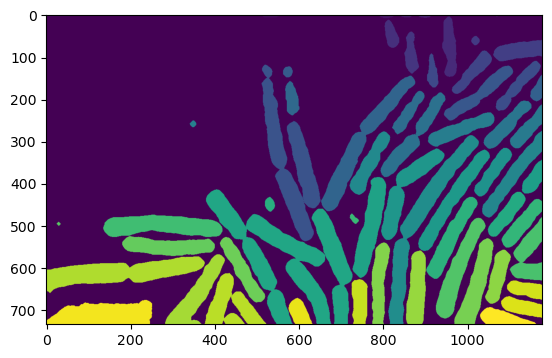

In [101]:
# segmentation de l image
# ndimage.label permet de segmenter l image en objets
label_image, nb_labels = ndimage.label(open_x)
print(nb_labels)
plt.imshow(label_image)
plt.show()

[0.0000e+00 3.8000e+01 5.5000e+01 1.7400e+02 2.0700e+02 2.4500e+02
 2.8600e+02 3.0500e+02 3.1400e+02 3.2100e+02 3.5000e+02 4.7400e+02
 6.0900e+02 1.0780e+03 1.4170e+03 1.5310e+03 1.9290e+03 2.1810e+03
 2.2020e+03 2.2730e+03 2.6400e+03 2.8100e+03 3.1460e+03 3.1560e+03
 3.3810e+03 3.5040e+03 3.5340e+03 3.6190e+03 3.7680e+03 3.7860e+03
 4.1730e+03 4.1780e+03 4.3030e+03 4.3360e+03 5.1260e+03 5.2050e+03
 5.3280e+03 5.5270e+03 5.7160e+03 6.0340e+03 6.4290e+03 6.9090e+03
 7.0170e+03 7.1430e+03 7.3640e+03 7.8690e+03 8.0250e+03 8.5080e+03
 8.7720e+03 9.0740e+03 9.1030e+03 9.1540e+03 1.1002e+04 1.1204e+04
 1.3112e+04 1.6204e+04 1.7170e+04 2.1540e+04 3.9048e+04]


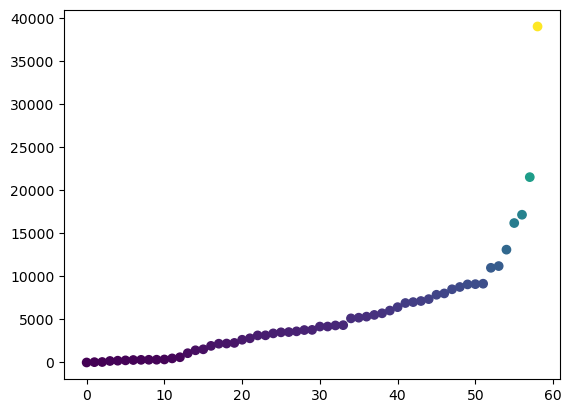

In [ ]:
# mesure de la taille des objets
sizes = ndimage.sum(open_x, label_image, range(nb_labels))
sizes_sorted = np.sort(sizes)
print(sizes_sorted)
plt.scatter(range(nb_labels), sizes_sorted, c=sizes_sorted)

# affichage nuage de point en fonction de leur taille
# sizes_cutoff = sizes.copy()
# sizes_cutoff[sizes_cutoff < 3000] = 0
# plt.scatter(range(nb_labels), sizes_cutoff, c=sizes_cutoff)
plt.show()